<a href="https://www.inove.com.ar"><img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/PA%20Banner.png" width="1000" align="center"></a>


# Visualización y limpieza con Pandas

Visualización de los datos del dataset propiedades\
v1.1

In [8]:
import os
import platform

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Recolectar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline1.png" width="1000" align="middle">

In [4]:
if os.access('propiedades.csv', os.F_OK) is False:
    if platform.system() == 'Windows':
        !curl https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/propiedades.csv > propiedades.csv
    else:
        !wget propiedades.csv https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/propiedades.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed

  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
  0  227k    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  227k  100  227k    0     0   227k      0  0:00:01  0:00:01 --:--:--  227k


# Procesar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline2.png" width="1000" align="middle">

In [10]:
df = pd.read_csv("propiedades.csv")
des = df.describe()
des.loc['Nan'] = df.isna().sum()
des.loc['%Nan'] = (df.isna().mean())*100
des

,Unnamed: 0,latitud,longitud,precio,m2,ambientes
count,1050.000000,1050.000000,1050.000000,1050.000000,1048.000000,1044.000000
mean,524.500000,-34.526132,-58.423896,35737.122857,62.232777,2.143678
std,303.253195,2.549434,2.319076,49897.697379,56.281333,1.339870
min,0.000000,-38.505290,-120.740135,27.000000,0.000000,0.000000
25%,262.250000,-34.608908,-58.448632,16800.000000,35.000000,1.000000
50%,524.500000,-34.594705,-58.423578,25000.000000,45.000000,2.000000
75%,786.750000,-34.578902,-58.395060,39000.000000,70.000000,3.000000
max,1049.000000,47.751076,-34.588875,820000.000000,700.000000,18.000000
Nan,0.000000,0.000000,0.000000,0.000000,2.000000,6.000000
%Nan,0.000000,0.000000,0.000000,0.000000,0.190476,0.571429


In [11]:
df.head()

,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_10_11,-34.611270,-58.36378,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_10_11,-34.589848,-58.50942,https://departamento.mercadolibre.com.ar/MLA-7...,Oportunidad! Monoambiente A Estrenar - Alquile...,Departamento,50.0,USD,38.0,1.0
2,2,2020_10_11,-34.605970,-34.60597,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,1866.0,ARS,57.0,1.0
3,3,2020_10_11,-34.590656,-58.44873,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,30000.0,ARS,60.0,3.0
4,4,2020_10_11,-34.624084,-58.38989,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,2100.0,ARS,64.0,3.0


In [14]:
# Sacamos todas las filas de la tabla las cuales el campo "m2" o "ambientes" se encuentre vacio
df_clean = df.copy()
df_clean.dropna(subset=['m2'], inplace=True)
df_clean.dropna(subset=['ambientes'], inplace=True)

# Otra manera de obtener el mismo resultado:
#df_clean = df[df['m2'].notna()]
#df_clean = df_clean[df_clean['ambientes'].notna()]

In [15]:
# ¿Cuántos datos quedaron para analizar?
# (filas, columnas)
df_clean.shape

(1044, 11)

## Fin de la limpieza
Se finalizó la limpieza sacando aquellas filas que no eran de interes, se puede observar que la cantidad de filas hasta el momento es menor a la cantidad de filas con la que se comnezó el análisis

In [16]:
print('Cantidad de datos en observacion:', df_clean.shape[0])

Cantidad de datos en observacion: 1044


# Explorar datos
<img src="https://raw.githubusercontent.com/InoveAlumnos/dataset_analytics_python/master/images/Pipeline3.png" width="1000" align="middle">

In [17]:
df_clean.head()

,Unnamed: 0,fecha,latitud,longitud,url,titulo,tipo_propiedad,precio,moneda,m2,ambientes
0,0,2020_10_11,-34.611270,-58.36378,https://departamento.mercadolibre.com.ar/MLA-7...,Departamento-alquiler - Puerto Madero-situar,Departamento,2900.0,USD,192.0,4.0
1,1,2020_10_11,-34.589848,-58.50942,https://departamento.mercadolibre.com.ar/MLA-7...,Oportunidad! Monoambiente A Estrenar - Alquile...,Departamento,50.0,USD,38.0,1.0
2,2,2020_10_11,-34.605970,-34.60597,https://departamento.mercadolibre.com.ar/MLA-8...,Alquiler Temporario De Lujo 4/p Hospital Itali...,Departamento,1866.0,ARS,57.0,1.0
3,3,2020_10_11,-34.590656,-58.44873,https://departamento.mercadolibre.com.ar/MLA-8...,Excelente Departamento 3 Ambientes (2 Cuartos)...,Departamento,30000.0,ARS,60.0,3.0
4,4,2020_10_11,-34.624084,-58.38989,https://departamento.mercadolibre.com.ar/MLA-8...,Departamentos Alquil Temporario Centro Cap Fed...,Departamento,2100.0,ARS,64.0,3.0


Se puede observar que hay alquileres en dolares, solo nos quedaremos con aquellos alquileres en pesos

In [23]:
# Filtramos el dataframe, solos nos quedamos con los alquileres en pesos
df_ars = df_clean[df_clean['moneda'] == 'ARS']
print('Cantidad de datos en observacion:', df_ars.shape[0])

Cantidad de datos en observacion: 928


<AxesSubplot:>

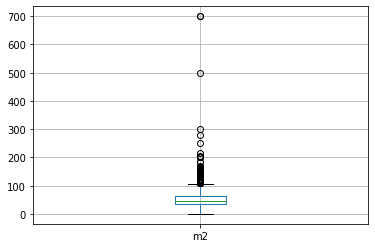

In [19]:
# Renderizamos el gráfico utilizando el diagrama de cajas
df_ars.boxplot(column=['m2'])

Se puede observar que hay muchos alquileres "outliers", es decir que se escapan de la tendencia. Filtraremos aquellos que no aportan al análisis

In [24]:
# Nos quedamos solamente con los deparamentos menor a 200m2 y mayor a 50m2
# Utilizamos el concepto de "máscara" tal cual fue visto en Numpy
# para filtrar el dataframe de propiedads deseado
propiedades = df_ars[(df_ars['m2'] < 200) & (df_ars['m2'] > 50)]

In [25]:
print('Cantidad de datos en observacion:', propiedades.shape[0])

Cantidad de datos en observacion: 323


<AxesSubplot:xlabel='[m2]', ylabel='[precio]'>

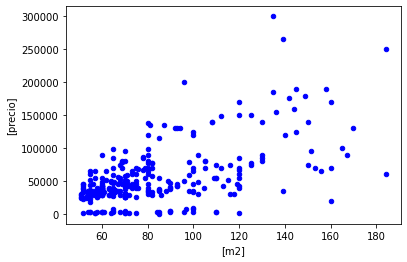

In [28]:
# Graficar la tendencia
propiedades.plot.scatter(['m2'], ['precio'], color='b')

## Conclusión
Esconcido entre los datos se puede apreciar una relación lineal entre los precios de las propiedades, se puede ver como esa nube de puntos azul tiene una tendencia, al aumentar los m2 claramente aumenta el precio del alquiler.
Los próximos pasos son crear un modelo base, el cual sería el primer modelo que podríamos crear sin inteligencia artificial para comparar nuestros próximos modelos de inteligencia artificial